# Pymaceuticals Observed Trends
* Trend 1
* Trend 2
* Trend 3

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# Read in the clinical trials data into data frames
csv_path = 'data/clinicaltrial_data.csv'

ct_df = pd.read_csv(csv_path)

ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Read in the clinical trials data into data frames
csv_path = 'data/mouse_drug_data.csv'

mouse_df = pd.read_csv(csv_path)

mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# In order to analyze the data by treatment, we need to merge the data
merged_data = pd.merge(ct_df, mouse_df, on="Mouse ID", how="inner")

In [5]:
# Then we select the columns we care about for the next scatter plot
vol_vs_time = merged_data.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]]

vol_vs_time = vol_vs_time.mean()

scattered_df = vol_vs_time.reset_index().pivot(index="Timepoint", columns="Drug", values = "Tumor Volume (mm3)")[["Capomulin","Ketapril","Placebo","Infubinol"]]

scattered_df.head()

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,47.125589,47.062001
10,43.084291,49.582269,49.423329,49.403909
15,42.064317,52.399974,51.359742,51.296397
20,40.716325,54.920935,54.364417,53.197691


In [16]:
# Compute error bar by looping through each timepoint and computing the sem at each value, for each treatment
drugs = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]

# We will use these dictionaries to reference the relative means and sems
sems = {}
means = {}

for drug in drugs: 
    subset_df = merged_data.loc[merged_data["Drug"]==drug, ["Timepoint", "Tumor Volume (mm3)"]]
    sems[drug] = [stats.sem(subset_df.loc[subset_df["Timepoint"] == x, ["Tumor Volume (mm3)"]]) for x in np.arange(0,50,5)]
    means[drug] = scattered_df[drug]

## Tumor Response to Treatment

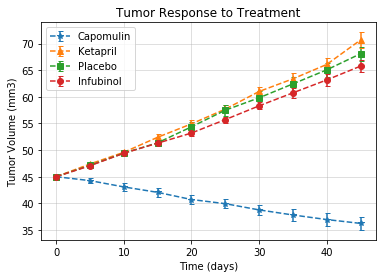

In [20]:
# This scatter plot shows how the tumor volume changes over time for each treatment.
x_axis = np.arange(0,50,5)

plt.errorbar(np.arange(0, 50, 5), means["Capomulin"], yerr = sems["Capomulin"], fmt = '*--', capsize = 2.5)
plt.errorbar(np.arange(0, 50, 5), means["Ketapril"], yerr = sems["Ketapril"], fmt = '^--', capsize = 2.5)
plt.errorbar(np.arange(0, 50, 5), means["Placebo"], yerr = sems["Placebo"], fmt = 's--', capsize = 2.5)
plt.errorbar(np.arange(0, 50, 5), means["Infubinol"], yerr = sems["Infubinol"], fmt = 'o--', capsize = 2.5)

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# Plot the graph
plt.show()

In [51]:
scattered_df.keys

<bound method NDFrame.keys of Drug       Capomulin   Ketapril    Placebo  Infubinol
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  47.389175  47.125589  47.062001
10         43.084291  49.582269  49.423329  49.403909
15         42.064317  52.399974  51.359742  51.296397
20         40.716325  54.920935  54.364417  53.197691
25         39.939528  57.678982  57.482574  55.715252
30         38.769339  60.994507  59.809063  58.299397
35         37.816839  63.371686  62.420615  60.742461
40         36.958001  66.068580  65.052675  63.162824
45         36.236114  70.662958  68.084082  65.755562>